
# Project: Investigate a Dataset - [No-Show Appointments Data Analysis]
### By Nelson Masanganise


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset to be analysed collects information from over 100K medical appointments in Brazil. Its focus is centered on the question of whether or not patients show up for their appointment. 

### Dataset Description 
The dataset is in the form of a CSV file. The variables contained per row include:
1. PatientId - this is the identifier of a patient who made an appointment.
2. Gender - whether the patient is male or female.
3. Scholarship - this is an indication whether or not the patient is enrolled in the Brasilian welfare program, Bolsa Family.
4. Hipertension - whethere the patient suffers from hipertension
5. Handcap - whether or not the patient is handicapped
6. Neighbourhood - indicates the location of the hospital.
7. SMS_received - indicates whether a patient received or did not receive an SMS for their appointment
8. No_show - indicates whether the patient showed up (NO) or did not show up (YES) for their appointment
9. Age - the number of years for the patient
10. Alcoholism - indicates whether the patient suffers from alcoholism or not
11. ScheduledDay - indicates the day on which the patient set up their appointment
12. Diabetes - whether the patient suffers from diabetes or not
13. AppointmentDay - tells us the day in which the appointment was confirmed
14. AppointmentID - distincts the appointments 


### Question(s) for Analysis
The research questions asked on this dataset are: 
1. Is Age an influencing factor on the attendance?
2. Is Age and Chronic diseases combined influence attendance?
3. Does location of the hospital influence attendance?
 

In [1]:
# Used this cell to set up import statements for all of the packages
# For this dataset, I used the following packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.5MB/s eta 0:00:01   18% |█████▉                          | 1.9MB 27.6MB/s eta 0:00:01    29% |█████████▌                      | 3.1MB 20.6MB/s eta 0:00:01    55% |█████████████████▉              | 5.8MB 30.2MB/s eta 0:00:01    68% |█████████████████████▉          | 7.1MB 28.4MB/s eta 0:00:01    81% |██████████████████████████▏     | 8.5MB 30.4MB/s eta 0:00:01    95% |██████████████████████████████▋ | 10.0MB 30.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.8MB/s eta 0:00:01   40% |████████████▉                   | 5.4MB 25.9MB/s eta 0:00:01    60% |███████████████████▎            | 8.1MB 28.2MB/s eta 0:00:01    69% |██████████████████████▎         | 9.3MB 23.6MB/s eta 0:00:01    79% |█████████████████████████▍      | 10.6MB 28.4MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
     

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# I then call the shape() method to see the number of rows and columns
df.shape

(110527, 14)

In [5]:
# Next, I check for duplications of the rows
df.duplicated().sum()

0

In [20]:
# Since the PatientId is the unique identifier, I then check if there are duplicated patient ids with duplicated No-show status
df.duplicated(['PatientId', 'No_show']).sum()

38710

In [8]:
# From there i then checked for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Then I have a summary description of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the description, it is evident that Age has a (-1) value, a large number of patients  fall in the 37yr to 55 yr category with 37 being the mean age, 25% of the patients have received an SMS. In terms of chronic diseases, the majority does not suffer from any. Alcoholism is low and so are the people enroled for scholarships.

In [12]:
# Pull out the row which has negative 1 value for age
mask = df.query('Age == "-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



### Data Cleaning
 

In [13]:
# We can drop the row with the negative value for age
df.drop(index = 99832, inplace = True)

In [14]:
# Describing the data after deletion
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [18]:
# The No-show column has to be changed to No_show to allow manipulation of the column
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
# We then remove the duplicated Patient Ids identified earlier which have a duplicated No_show status
df.drop_duplicates(['PatientId', 'No_show'], inplace = True)
df.shape

(71816, 14)

In [24]:
# We then remove the columns that are not necessary to this data analysis
# These are PatientId and AppointmentID 
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


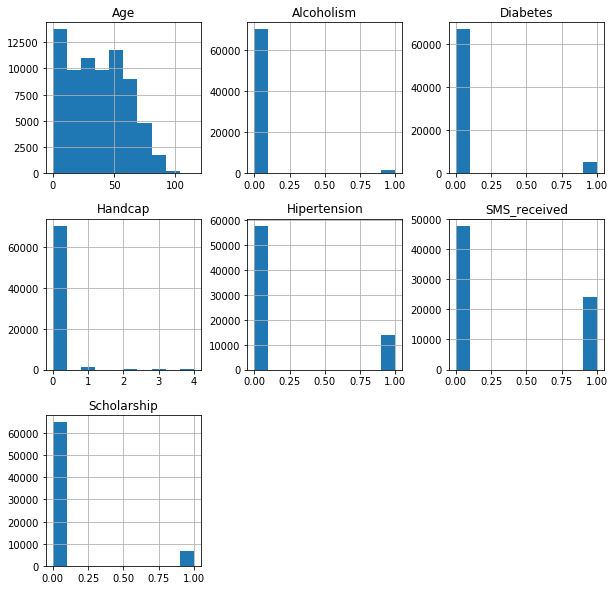

In [25]:
# We then represent the data in the form of histograms
df.hist(figsize = (10,10));

In [26]:
# The data for the patients will be divided to allow exploratory data analysis
# One group represents patients who showed up for their appointments
# The second group represents patients who did not show up for their appointments
show_up = df.No_show == 'No'
noshow_up =df.No_show == 'Yes'
df[show_up].count(), df[noshow_up].count()

(Gender            54153
 ScheduledDay      54153
 AppointmentDay    54153
 Age               54153
 Neighbourhood     54153
 Scholarship       54153
 Hipertension      54153
 Diabetes          54153
 Alcoholism        54153
 Handcap           54153
 SMS_received      54153
 No_show           54153
 dtype: int64, Gender            17663
 ScheduledDay      17663
 AppointmentDay    17663
 Age               17663
 Neighbourhood     17663
 Scholarship       17663
 Hipertension      17663
 Diabetes          17663
 Alcoholism        17663
 Handcap           17663
 SMS_received      17663
 No_show           17663
 dtype: int64)

This means that the number of patients who showed up for their appointsments = 54153
The number of patients who did not show up for their appointments = 17663

In [28]:
# We then look for the mean values of the show up vs no show up
df[show_up].mean(), df[noshow_up].mean()

(Age             37.229166
 Scholarship      0.091334
 Hipertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hipertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is Age an influencing factor on the attendance?)

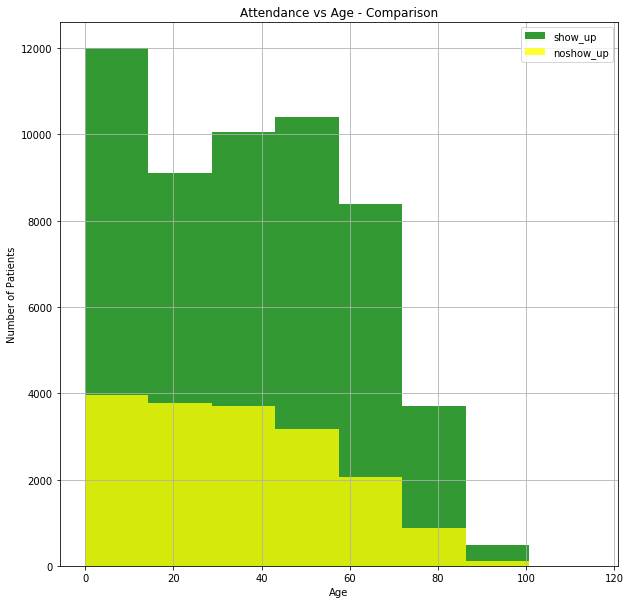

In [29]:
# To what extent does age play a role in people attending/not attending to their appointments

# Define the function
def attend_app(df, column_name, present, absent):
    
    # Create a figure
    plt.figure(figsize = [10, 10]) # Set the figure size
    
    # Draw the plot
    df[column_name][show_up].hist(alpha=0.8, bins=8, color='green', label='show_up')
    df[column_name][noshow_up].hist(alpha=0.8, bins=8, color='yellow', label='noshow_up')
    
    # Label the plot
    plt.legend();
    plt.title('Attendance vs Age - Comparison')
    plt.xlabel('Age')
    plt.ylabel('Number of Patients');
attend_app(df, 'Age', show_up, noshow_up)


1. From the histogram, ages between 0 and 16 have high attendance to appointments and this could be attributed by the fact that the age group is still being looked after by their parents.
2. Age groups 72 to 100 have the lowest show up attendance and this could be due to old age hence mobility is restricted.

### Research Question 2  (Is Age and Chronic diseases combined influence attendance?)

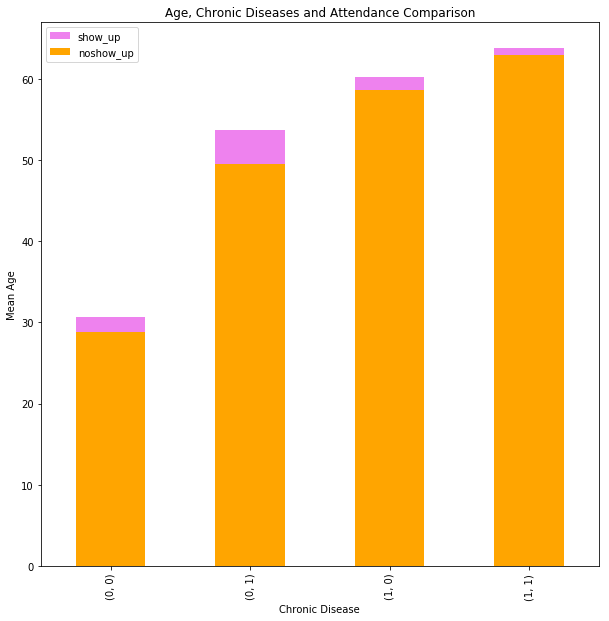

In [34]:
# Lets look at the link between age and chronic diseases and their effect on the attendance to appointments

# Create a figure
plt.figure(figsize = [10, 10]) #set the figure size

# Draw plot
df[show_up].groupby(['Hipertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='violet', label='show_up')
df[noshow_up].groupby(['Hipertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='orange', label='noshow_up')

# Label plot
plt.legend();
plt.title('Age, Chronic Diseases and Attendance Comparison')
plt.xlabel('Chronic Disease')
plt.ylabel('Mean Age');


From the bar graph above, one can tell that at the mean age of 30, there are less cases of chronic diseases
At a mean age of 50, there is a significant number of both patients who showed up and did not show up, who are suffering from diabetes.
At the mean age of 60 a higher number of no show ups suffer from Hipertension

### Research Question 3  (Does location of the hospital influence attendance?)

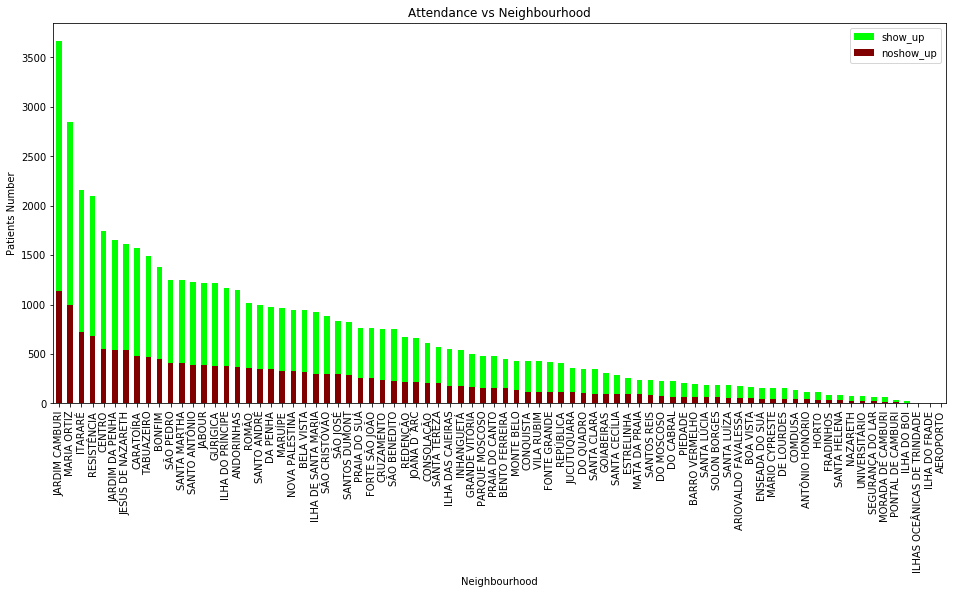

In [37]:
# How does neighbourhhod influence the attendance of appointments

# Create figure
plt.figure(figsize = [16,7]) # Set the figure size

# Draw plot
df.Neighbourhood[show_up].value_counts().plot(kind='bar', color='lime', label='show_up')
df.Neighbourhood[noshow_up].value_counts().plot(kind='bar', color='maroon', label='noshow_up')

# Labeling the plot
plt.legend() 
plt.title('Attendance vs Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');


From the bar graph, it is evident that patient attendance is determined by the location of the hospital. 
Jardim Camburi is the location that has seen the most patients both attending and not attending to their appointments.
Aeroporto on the other hand has close to zero patients who attend their appoints there.

<a id='conclusions'></a>
## Conclusions

1. Looking at research question 1, it can be noticed that Age has a bearing on whether people attend to their appointments or not. For the younger generation (0 - 16 years) showing up for appointments is significantly higher (12K) than not showing up (4K). This could be attributed to the fact that the greater younger generation is still under the care of their parents who prioritise healthcare. Attendance to appointments drops as you move to the working class and the senior citizens.

2. From reseaarch question 3, it is evident that the neighbourhood where the hospital is located has a significant influence on the attendance. Jardim Camburi has the has number of patients showing up for their appointments as compared to the no shows. This can be attributed to the fact that it is easily accessible to the patient or that it offers good service to its patients.

### Limitation
3. As the mean age goes up we saw that patients are more likely to get chronic diseases however there is no clear correlation between chronic diseases and attending to appointments.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0